In [1]:
import tensorflow as tf
from tensorflow import keras

2022-11-23 21:20:19.844609: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
!wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
!unzip dino-dragon.zip

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size = 3, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

model.compile(optimizer = opt, 
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

2022-11-23 21:20:29.484366: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 21:20:29.490778: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 21:20:29.491445: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-23 21:20:29.492518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [5]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    r"./train/",
    target_size=(150, 150),
    batch_size=20,
    shuffle = True,
    class_mode = 'binary'
)

Found 1594 images belonging to 2 classes.


In [6]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    r"./test/",
    target_size=(150, 150),
    batch_size=20,
    shuffle = True,
    class_mode = 'binary'
)

Found 394 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
80/80 [==============================] - 9s 109ms/step - loss: 0.2119 - accuracy: 0.9228 - val_loss: 0.3368 - val_accuracy: 0.8604
Epoch 2/10
80/80 [==============================] - 9s 107ms/step - loss: 0.1782 - accuracy: 0.9435 - val_loss: 0.3192 - val_accuracy: 0.8706
Epoch 3/10
80/80 [==============================] - 9s 107ms/step - loss: 0.1689 - accuracy: 0.9360 - val_loss: 0.3580 - val_accuracy: 0.8452
Epoch 4/10
80/80 [==============================] - 9s 107ms/step - loss: 0.1388 - accuracy: 0.9567 - val_loss: 0.3181 - val_accuracy: 0.8604
Epoch 5/10
80/80 [==============================] - 9s 106ms/step - loss: 0.1259 - accuracy: 0.9661 - val_loss: 0.3058 - val_accuracy: 0.8655
Epoch 6/10
80/80 [==============================] - 9s 107ms/step - loss: 0.0986 - accuracy: 0.9755 - val_loss: 0.3134 - val_accuracy: 0.8655
Epoch 7/10
80/80 [==============================] - 8s 106ms/step - loss: 0.0821 - accuracy: 0.9856 - val_loss: 0.3232 - val_accuracy: 0.8655
Epoch 

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

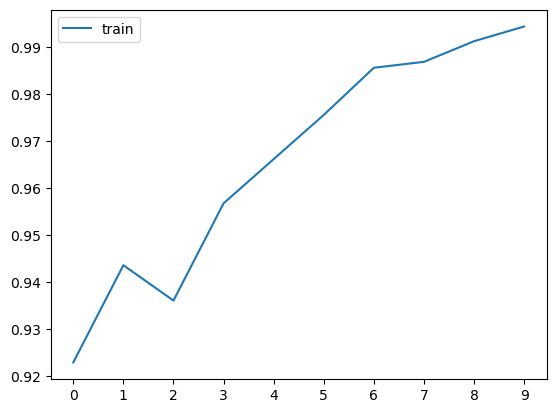

In [16]:
plt.plot(history.history['accuracy'], label='train')
#plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [17]:
print(np.median(history.history['accuracy']))

0.970828115940094


In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
print(np.std(history.history['loss']))

0.05367620911847653


In [19]:
print(np.mean(history.history['val_loss']))

0.3305045932531357
